<a href="https://colab.research.google.com/github/Edunet-Foundation/vodafone-prgm/blob/main/Logistic_Regression/Social_Network_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.kaggle.com/rakeshrau/social-network-ads

In [ ]:
# Reading the dataset and converting into Dataframe
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ameer-fice/ai-vodafone/main/datasets/Social_Network.csv')
x = df.iloc[:,[2,3]].values
y = df.iloc[:,4].values

# Sklearn expects input to be in 2 Dimension

In [ ]:
df.shape
# Checking the number of rows and columns in a DataFrame

(400, 5)

In [ ]:
# Purchased column : 0 or 1

# INput: Age and Salary
# Output : Purchased

In [ ]:
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [ ]:
# How many ppl purchased/Not purchased?
# Method 1
df['Purchased'].value_counts() # Only for Pandas object and not for Numpy

0    257
1    143
Name: Purchased, dtype: int64

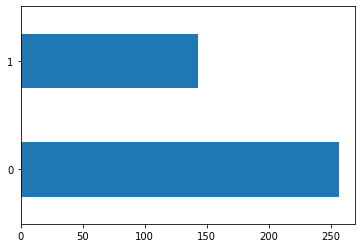

In [ ]:
df['Purchased'].value_counts().plot(kind='barh')
# Pandas plotting (No need of matplotlib)

In [ ]:
# Method 2
import numpy as np
np.unique(y,return_counts=True)

(array([0, 1]), array([257, 143]))

In [ ]:
# Splitting the data into 75:25 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
#Normalization: Scaling in the range of (0-1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# https://stackoverflow.com/questions/48692500/fit-transform-on-training-data-and-transform-on-test-data

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
# We get coefficients from Gradient Descent Optimization (solver)
print(model.coef_)
print(model.intercept_)

[[4.89232634 2.53768971]]
[-4.08983426]


In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [ ]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([68, 32]))

In [ ]:
np.unique(y_pred,return_counts=True)

(array([0, 1]), array([77, 23]))

In [ ]:
# Probabilities
# Sigmoid Function
# ROC-AUC Curve
# Evaluation: Accuracy Score

In [ ]:
# Probabilities

In [ ]:
y_prob_pred = model.predict_proba(x_test)
y_prob_pred.shape

(100, 2)

In [ ]:
y_pred[0]

0

In [ ]:
y_prob_pred[0]

array([0.79225834, 0.20774166])

In [ ]:
y_prob_pred_out = np.argmax(y_prob_pred,axis=1)
y_prob_pred_out

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
# Evaluation : Accuracy Score
# Confusion Matrix : Precision/Recall/F1-Score (Only for imbalanced dataset)

In [ ]:
# 2 categories : 1000 values and 90000 values (Example of Imbalanced Dataset)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_pred,y_test)

0.89

In [ ]:
c_m = confusion_matrix(y_pred,y_test)
c_m
#(array([0, 1]), array([77, 23]))

array([[67, 10],
       [ 1, 22]])

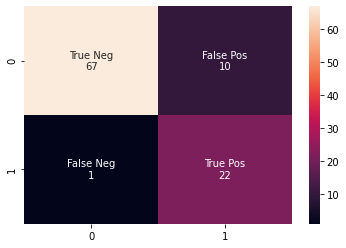

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = [value for value in c_m.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(c_m, annot=labels, fmt='')
plt.show()

In [ ]:
# True Negative
# False Negative
# False Positive 
# True Positive

In [ ]:
(67+22)/(67+10+1+22)

0.89

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.87      0.92        77
           1       0.69      0.96      0.80        23

    accuracy                           0.89       100
   macro avg       0.84      0.91      0.86       100
weighted avg       0.92      0.89      0.90       100



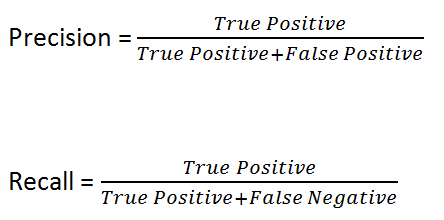

In [ ]:
# Precision Example of 1
67/(67+1)

0.9852941176470589

In [ ]:
# Precision of 0
22/(22+10)

0.6875

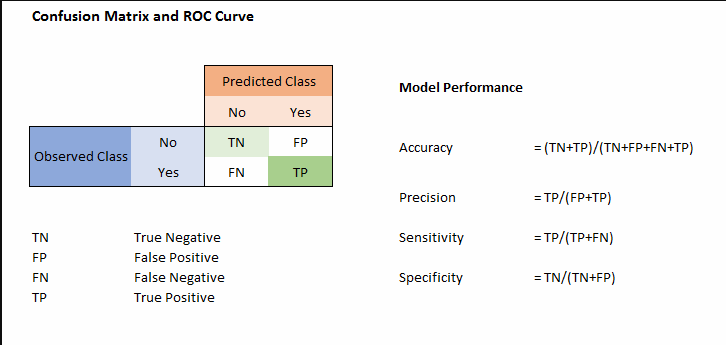

In [ ]:
# Logistic Regression

# 1. Input and Output
# 2. Gradient Descent ( Optimization Algorithm ): It gives Coefficients and Intercept
# y = m1x1+m2x2+c
# 3. Sigmoid Function on the equation to get probabilities
# 4. From probabilities you get Max Index Output

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def prediction_function(age,sal):
    m1 = model.coef_[0][0]
    m2 = model.coef_[0][1]
    c = model.intercept_[0]
    z = (m1 * age )+(m2*sal)+ c 
    y = sigmoid(z)
    return y

In [ ]:
age = x_test[0][0]
sal = x_test[0][1]
prediction_function(age,sal)

0.2077416625552371

In [ ]:
1-0.2077416625552371

0.7922583374447629

In [ ]:
y_prob_pred[0]

array([0.79225834, 0.20774166])

In [ ]:
result = []
for i in range(x_test.shape[0]):
  age = x_test[i][0]
  sal = x_test[i][1]
  result.append(1-prediction_function(age,sal))

In [ ]:
result

[0.7922583374447629,
 0.750678735473035,
 0.7274542929985177,
 0.8159242006635616,
 0.8102579868741706,
 0.9501447296355265,
 0.9292708708715455,
 0.39370123817990577,
 0.9566261555374937,
 0.5462334923643397,
 0.8862408116887319,
 0.8978065091509405,
 0.7548652036989376,
 0.6173259520306796,
 0.9256855736647198,
 0.6322062239963432,
 0.6706621785150084,
 0.9344724321759766,
 0.08457049169482034,
 0.8784702568631977,
 0.818776559844641,
 0.15276153397264414,
 0.6756793431856712,
 0.2728930270433798,
 0.9631390239253871,
 0.1312810843300345,
 0.8280059051678725,
 0.8301456824777184,
 0.7297090726108733,
 0.7548080308865139,
 0.9143661280701452,
 0.6623056836667339,
 0.21434401124925861,
 0.7617551677370218,
 0.9297352310977907,
 0.9675265269423123,
 0.9155410909602747,
 0.8455027660047086,
 0.9018885115365403,
 0.5210075631399133,
 0.8414753210190649,
 0.6715465493099155,
 0.8512497966844522,
 0.8824271838952269,
 0.343972318123835,
 0.9031895453756373,
 0.6580887069619701,
 0.217473971

In [ ]:
# 0.4 as the threshold (Can we take this?)
# ?

In [ ]:
# ROC - Receiver Operating Curve
# TO determine best Threshold value
# Sensitivity = TPR
# Specificity = FPR = 1-TPR

In [ ]:
final = model.predict_proba(x_test)[:,1]


In [ ]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,final)

In [ ]:
thresholds

array([1.95232175, 0.95232175, 0.88677761, 0.87699236, 0.47899244,
       0.45376651, 0.43611194, 0.43527875, 0.41592046, 0.40147452,
       0.39792558, 0.36243604, 0.34859827, 0.34191129, 0.33769432,
       0.32432066, 0.30721254, 0.18122344, 0.17962875, 0.09811149,
       0.09681045, 0.02260819])

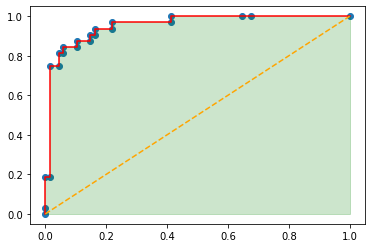

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(fpr,tpr,label='ROC')
plt.plot(fpr,tpr,c='r')
plt.plot([0,1],[0,1],color='orange',linestyle='--')
plt.fill_between(fpr,tpr,color='g',alpha=0.2)
plt.show()